In [103]:
from google.colab import files
upload = files.upload()

Saving forestfires.csv to forestfires (1).csv


In [104]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [106]:
import pandas as pd
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [107]:
df.shape

(517, 31)

In [7]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [108]:
# finding duplicate rows
df.duplicated()
df.duplicated().sum()

8

In [109]:
df =df.drop_duplicates()

In [10]:
df.shape

(509, 31)

In [110]:
# finding duplicate columns
df.columns.duplicated()
df.columns.duplicated().sum()

0

In [112]:
# finding null values
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

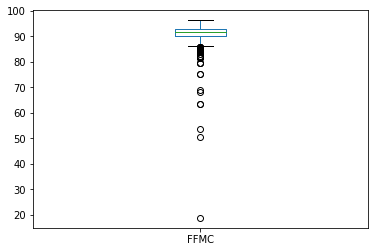

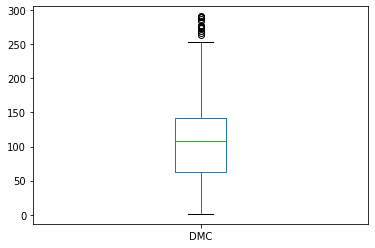

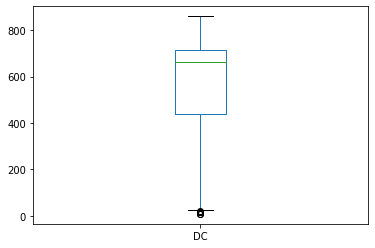

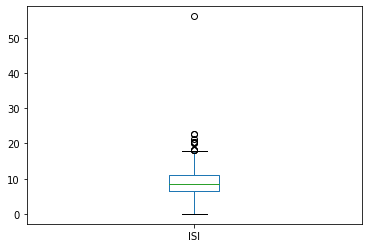

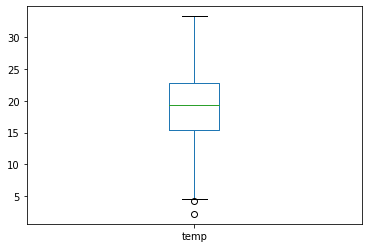

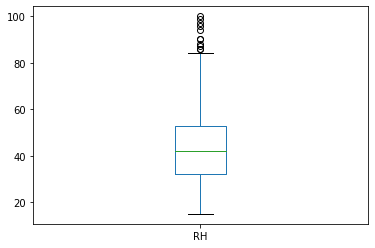

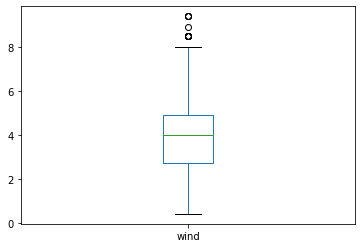

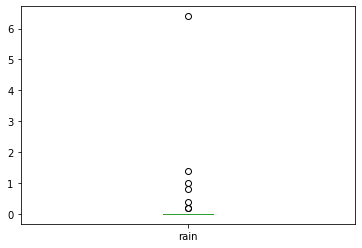

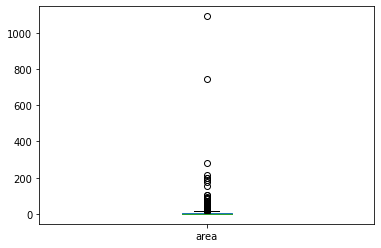

(358, 31)

In [113]:
# Data visualization
# Boxplots

import matplotlib.pyplot as plt

def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

plot_boxplot(df,"FFMC")
plot_boxplot(df,"DMC")
plot_boxplot(df,"DC")
plot_boxplot(df,"ISI")
plot_boxplot(df,"temp")
plot_boxplot(df,"RH")
plot_boxplot(df,"wind")
plot_boxplot(df,"rain")
plot_boxplot(df,"area")

def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  ls = df.index[(df[ft]< lower_bound) | (df[ft]> upper_bound)]
  return ls 

index_list = []
for feature in ["FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"]:
  index_list.extend(outliers(df,feature))

index_list

def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df
df_cleaned = remove(df,index_list)
df_cleaned.shape

In [13]:
df_cleaned.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [114]:
# labelencoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_cleaned["month"] = LE.fit_transform(df_cleaned["month"])
df_cleaned["day"] = LE.fit_transform(df_cleaned["day"])
df_cleaned["size_category"] = LE.fit_transform(df_cleaned["size_category"])

In [115]:
df_cleaned.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int64
dtype: object

In [116]:
df_cleaned.shape

(358, 31)

In [118]:
df_cleaned.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,6,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,6,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
 # split into input(X) and output(Y) variables
 X=df_cleaned.iloc[:,0:-1]
 Y=df_cleaned.iloc[:,-1]

In [167]:
Y.value_counts()

1    303
0     55
Name: size_category, dtype: int64

In [121]:
X.dtypes

month         int64
day           int64
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
dayfri        int64
daymon        int64
daysat        int64
daysun        int64
daythu        int64
daytue        int64
daywed        int64
monthapr      int64
monthaug      int64
monthdec      int64
monthfeb      int64
monthjan      int64
monthjul      int64
monthjun      int64
monthmar      int64
monthmay      int64
monthnov      int64
monthoct      int64
monthsep      int64
dtype: object

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=3)

In [155]:
X_train.shape

(250, 30)

In [156]:
X_test.shape

(108, 30)

In [157]:
len(X_train.columns)

30

In [158]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(45, input_shape=(30,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,Y_train, epochs=100, batch_size=70)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 59.8716 - accuracy: 0.1760
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 47.1195 - accuracy: 0.2280
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 35.0092 - accuracy: 0.2640
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 23.2702 - accuracy: 0.2840
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 11.9453 - accuracy: 0.3240
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 3.9322 - accuracy: 0.5720
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 2.3225 - accuracy: 0.7960
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 3.2106 - accuracy: 0.8440
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 3.7134 - accuracy: 0.8440
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 3.8962 - accuracy: 0.8440
Epoch 11/100
4/4 [======

In [159]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.9537


[0.10804087668657303, 0.9537037014961243]

In [160]:
YP = model.predict(X_test)
YP[:10]

4/4 [==============================] - 0s 5ms/step


array([[0.9758942 ],
       [0.99947494],
       [0.9589919 ],
       [0.99521405],
       [0.02048158],
       [0.9718378 ],
       [0.9910719 ],
       [0.99517787],
       [0.98552954],
       [0.9892365 ]], dtype=float32)

In [161]:
Y_test[:10]

259    1
447    1
333    1
39     1
355    0
507    1
78     1
67     1
21     1
127    1
Name: size_category, dtype: int64

In [162]:
Y_pred = []
for element in YP:
  if element > 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)

In [163]:
Y_pred[:10]
# my model is predicting 100% correctly

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [164]:
from sklearn .metrics import confusion_matrix, classification_report
print(classification_report(Y_test,Y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.95      1.00      0.97        92

    accuracy                           0.95       108
   macro avg       0.97      0.84      0.89       108
weighted avg       0.96      0.95      0.95       108



Text(69.0, 0.5, 'Truth')

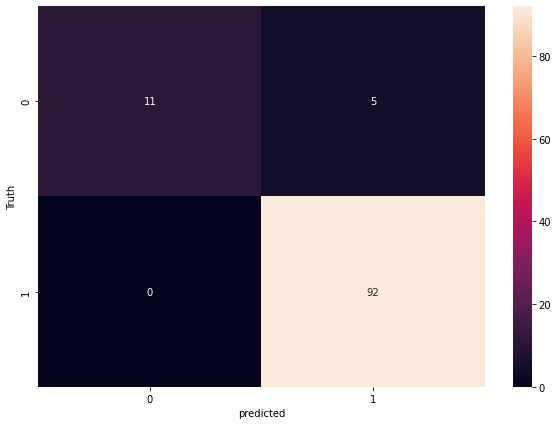

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

In [169]:
 # Accuracy score
 round((11+92)/(11+5+0+92),2)

0.95

In [170]:
# Precision for 0 class i.e. 
round((11/11+0),2 )

1.0

In [171]:
# Precision for 1 class I.e.
round(92/(92+5),2)

0.95

In [172]:
# Recall for 0 class
round(11/(11+5),2)

0.69

In [173]:
# recall for 1 class 
round(92/(92+0),2)

1.0

In [174]:
# F1 score for 0 class
round(2*1*0.69/(1+0.69),2)

0.82

In [175]:
# F1 score for 1 class 
round(2*0.95*1/(0.95+1),2)

0.97

In [ ]:
# Therefore my model is predict the burned area of Forest Fires with 95% Accuracy